In [22]:
import sys
sys.path
sys.path.append('../../../source_synphot/')
import source_synphot.passband
import source_synphot.io
import source_synphot.source
import astropy.table as at
from collections import OrderedDict
import pysynphot as S
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib notebook

#from zp_fit import *
from scipy.optimize import minimize
from astropy.stats import sigma_clip
import pandas as pd
import warnings
#warnings.filterwarnings("ignore")
def myround(x, prec=2, base=.5):
    return round(base * round(float(x)/base),prec)

from scipy.interpolate import interp1d

In [2]:
passbands = at.Table.read('../../../source_synphot/source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("TESS")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
model = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()

In [7]:
g = pbs['ps1g'][0]
r = pbs['ps1r'][0]
i = pbs['ps1i'][0]
z = pbs['ps1z'][0]
y = pbs['ps1y'][0]
t = pbs['tess'][0]

In [42]:
wave = np.arange(4000,12000)

In [44]:
rr = interp1d(np.array(r.wave),np.array(r.throughput),bounds_error=False,fill_value=0)(wave)
rr = rr/max(rr)
ii = interp1d(np.array(i.wave),np.array(i.throughput),bounds_error=False,fill_value=0)(wave)
ii = ii/max(ii)
zz = interp1d(np.array(z.wave),np.array(z.throughput),bounds_error=False,fill_value=0)(wave)
zz = zz/max(zz)
yy = interp1d(np.array(y.wave),np.array(y.throughput),bounds_error=False,fill_value=0)(wave)
yy = yy/max(yy)
tt = interp1d(np.array(t.wave),np.array(t.throughput),bounds_error=False,fill_value=0)(wave)
tt = tt/max(tt)

<IPython.core.display.Javascript object>


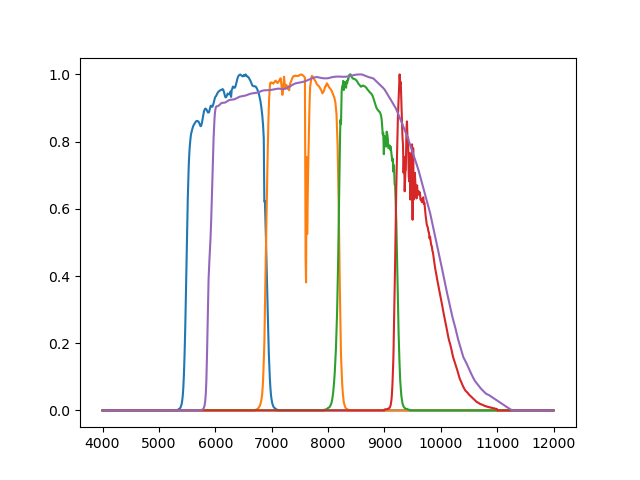

In [45]:
plt.figure()
plt.plot(wave,rr)
plt.plot(wave,ii)
plt.plot(wave,zz)
plt.plot(wave,yy)
plt.plot(wave,tt)

In [49]:
fr = sum(rr*tt)/sum(rr)
fi = sum(ii*tt)/sum(ii)
fz = sum(zz*tt)/sum(zz)
fy = sum(yy*tt)/sum(yy)

In [50]:
print(fr,fi,fz,fy)

0.6767010289980814 0.9751403182187806 0.9772876127534809 0.6725168402250226


In [ ]:
def PS1_tess_frac(ps1):
    fr = 0.6767
    fi = 0.9751
    fz = 0.9773
    fy = 0.6725
    
    comp = fr*ps1['r'] + fi*ps1['i'] + fz*ps1['z'] + fy*ps1['y']
    return comp